## Insurance cost Prediction

### Objective: 
Create a Regression Model that will help in predicting the price that person needs to pay for his insurance based on his BMI, Smoking habits, Age etc.,

### Data Dictionary:

- age: age of primary beneficiary

- sex: insurance contractor gender, female, male

- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

- children: Number of children covered by health insurance / Number of dependents

- smoker: Smoking

- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

- charges: Individual medical costs billed by health insurance

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#importing dataset
df = pd.read_csv("./appliedai/Insurance_prediction.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#sixe of the dataset
df.shape

(1338, 7)

In [5]:
#Unique values in each columns
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [6]:
#missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
#understanding the dataset
df.describe(include = "all")

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


### Univariate Analysis

In [8]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

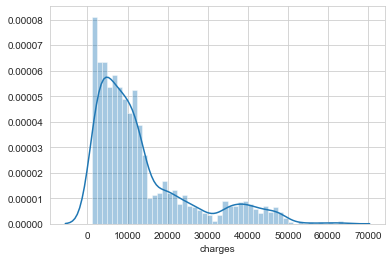

In [9]:
sns.set_style("whitegrid")
sns.distplot(df.charges, bins=50,)

Charges are Positively Skewed, which indicates there are very few people who pay higher insurance chages.

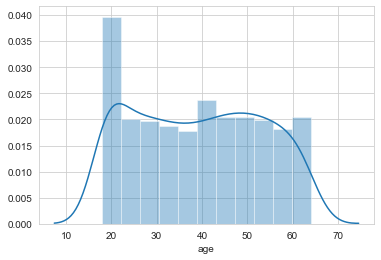

In [10]:
#Age
sns.distplot(df.age)

We see fair distribution of age, i.e., there is good amount of data from all age groups 

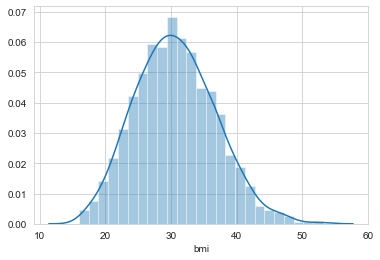

In [11]:
sns.distplot(df.bmi)

Bmi follows Normal Distribution

In [12]:
#Cagegorical Variables

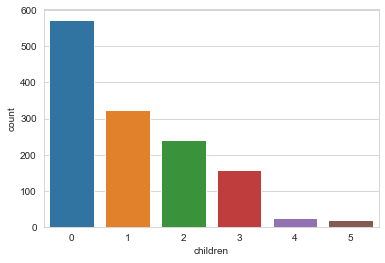

In [13]:
sns.countplot(df.children)

Majority of the insurance holders don't have children

no     0.795217
yes    0.204783
Name: smoker, dtype: float64


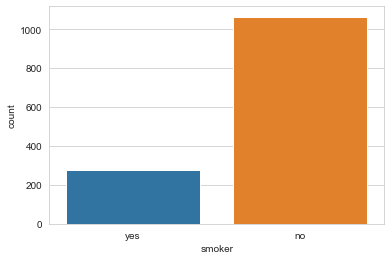

In [14]:
sns.countplot(df.smoker)
print(df.smoker.value_counts()/len(df))

Very few insurance holders are Smokers(20%)

southeast    0.272048
southwest    0.242900
northwest    0.242900
northeast    0.242152
Name: region, dtype: float64


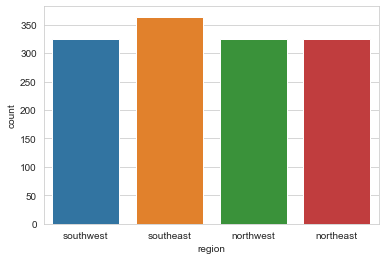

In [15]:
sns.countplot(df.region)
print(df.region.value_counts()/len(df))

We see fair number of insurances from all the four regions

### Bivariate Analysis

In [16]:
#Lets understand how Continuous columns are distributed wrt to charges

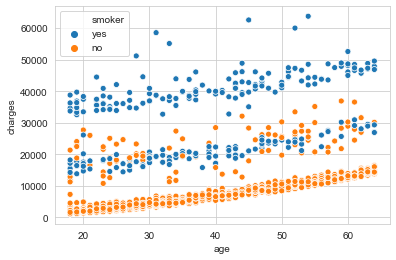

In [17]:
sns.scatterplot(x = df.age, y= df.charges,hue=df.smoker)

For Non-Smokers we see insurance charges are lower than Smokers and it varies as per age i.e., we see it increasing as they age

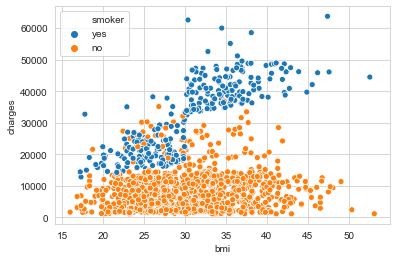

In [18]:
sns.scatterplot(x = df.bmi, y= df.charges, hue = df.smoker)

In [19]:
#Categorical variables - Box Plots

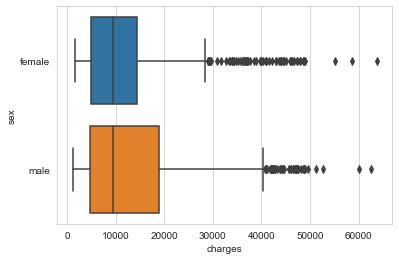

In [20]:
sns.boxplot(y = df.sex, x = df.charges)

On an average both men and women pay same charges for the insurance. 

In [21]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

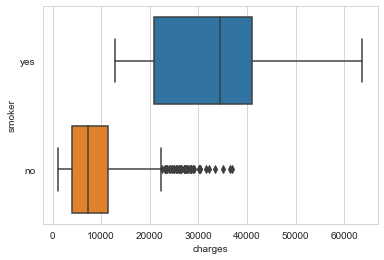

In [22]:
sns.boxplot(x =df.charges, y= df.smoker)

Smokers pay higher insurance charges than non smokers

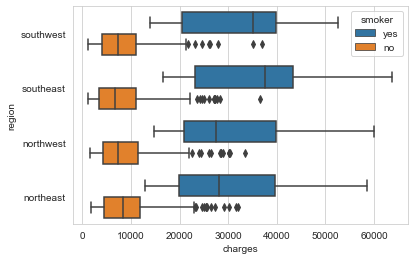

In [23]:
sns.boxplot(x= df.charges, y =df.region , hue=df.smoker)

In [24]:
df.groupby('children')['charges'].mean()

children
0    12365.975602
1    12731.171832
2    15073.563734
3    15355.318367
4    13850.656311
5     8786.035247
Name: charges, dtype: float64

### Feature Transformation

Since there are categorical columns in our data, its important to handle them using right techinque.
I chose 'One Hot Encoding' as each columns have limited no of categories (0-6), and fair number of dummies will be created.

Using drop_first = yes, to void dummy varible trap

In [25]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [26]:
final_df = pd.get_dummies(data=df,columns=['sex','children','smoker','region'] ,drop_first=True,prefix=['sex','children','smoker','region'])

In [27]:
final_df

,age,bmi,charges,sex_male,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,16884.92400,0,0,0,0,0,0,1,0,0,1
1,18,33.770,1725.55230,1,1,0,0,0,0,0,0,1,0
2,28,33.000,4449.46200,1,0,0,1,0,0,0,0,1,0
3,33,22.705,21984.47061,1,0,0,0,0,0,0,1,0,0
4,32,28.880,3866.85520,1,0,0,0,0,0,0,1,0,0
5,31,25.740,3756.62160,0,0,0,0,0,0,0,0,1,0
6,46,33.440,8240.58960,0,1,0,0,0,0,0,0,1,0
7,37,27.740,7281.50560,0,0,0,1,0,0,0,1,0,0
8,37,29.830,6406.41070,1,0,1,0,0,0,0,0,0,0
9,60,25.840,28923.13692,0,0,0,0,0,0,0,1,0,0


In [28]:
final_df['log_charges'] = np.log(final_df.charges)

In [29]:
final_df.drop(columns='charges',inplace=True)

In [30]:
final_df_2 = final_df

### Normalization

Before we start building the model, its important for us to Normalize the data. 
fit = calculates the variables required for the transformation
transform = performs transformation using variables calc using fit.
fit_transform =performs both fit and transform

In [31]:
from sklearn.preprocessing import StandardScaler

PredictorScalar = StandardScaler()
z = PredictorScalar.fit(final_df)
z

StandardScaler()

In [32]:
final_df = pd.DataFrame(z.fit_transform(final_df), columns= final_df.columns)

In [33]:
#Charges column is dropped
final_df.head()

,age,bmi,sex_male,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northwest,region_southeast,region_southwest,log_charges
0,-1.438764,-0.453320,-1.010519,-0.565267,-0.467525,-0.364607,-0.137987,-0.116775,1.970587,-0.566418,-0.611324,1.765481,0.691394
1,-1.509965,0.509621,0.989591,1.769076,-0.467525,-0.364607,-0.137987,-0.116775,-0.507463,-0.566418,1.635795,-0.566418,-1.790020
2,-0.797954,0.383307,0.989591,-0.565267,-0.467525,2.742680,-0.137987,-0.116775,-0.507463,-0.566418,1.635795,-0.566418,-0.759500
3,-0.441948,-1.305531,0.989591,-0.565267,-0.467525,-0.364607,-0.137987,-0.116775,-0.507463,1.765481,-0.611324,-0.566418,0.978513
4,-0.513149,-0.292556,0.989591,-0.565267,-0.467525,-0.364607,-0.137987,-0.116775,-0.507463,1.765481,-0.611324,-0.566418,-0.912181


### Splitting Data

In [34]:
from sklearn.model_selection import train_test_split
X = final_df.drop(columns="log_charges",axis= 1)
y= final_df.log_charges
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7)

In [35]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(936, 12) (402, 12) (936,) (402,)


### Modelling

### 1. Linear Regression

In [36]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [37]:
y_pred = regressor.predict(X_test)

In [38]:
from sklearn.metrics import r2_score, mean_squared_error
mse = mean_squared_error(y_pred,y_test)
print(mse)

0.2100499893344067


In [39]:
#R2 value
r2_score(y_test, y_pred)

0.7795668634207489

In [40]:
TestDataResult = pd.DataFrame(data= X_test, columns=X_test.columns)
TestDataResult['charges'] = y_test
TestDataResult['PredictedCharges'] = y_pred
TestDataResult.head()

,age,bmi,sex_male,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northwest,region_southeast,region_southwest,charges,PredictedCharges
1300,0.412467,-0.049771,0.989591,-0.565267,-0.467525,-0.364607,-0.137987,-0.116775,1.970587,-0.566418,1.635795,-0.566418,2.116822,1.264086
1159,-0.513149,1.712067,-1.010519,-0.565267,-0.467525,-0.364607,-0.137987,-0.116775,-0.507463,-0.566418,-0.611324,1.765481,-0.878119,-0.615476
352,-0.655551,-0.486129,-1.010519,-0.565267,-0.467525,-0.364607,-0.137987,-0.116775,-0.507463,-0.566418,-0.611324,1.765481,-1.003905,-0.878085
714,-1.082758,-1.322756,-1.010519,-0.565267,-0.467525,-0.364607,-0.137987,-0.116775,-0.507463,-0.566418,-0.611324,1.765481,-1.405332,-1.177755
699,-1.153959,1.411866,-1.010519,-0.565267,2.138925,-0.364607,-0.137987,-0.116775,-0.507463,-0.566418,1.635795,-0.566418,-1.020433,-0.720164


In [41]:
# lets calc MAPE for each row,as thats easily understood by everyone
#MSE is a error wrt to distance, MAPE tells the differnce between Price and Predicted price

TestDataResult['APE'] = (100*(abs(TestDataResult.charges - TestDataResult.PredictedCharges)/TestDataResult.charges))
print("Mean APE is: ", TestDataResult.APE.mean())
print("Meadian APE is:", TestDataResult.APE.median())
print("The accuracy of the final model is : ", np.round(100 -TestDataResult.APE.median(),2) )

Mean APE is:  222.41585619472295
Meadian APE is: 2.135752702178106
The accuracy of the final model is :  97.86


### What would be the MSE without Normalization?

In [42]:
from sklearn.model_selection import train_test_split
X = final_df_2.drop("log_charges",axis= 1)
y= final_df_2.log_charges
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7)

In [43]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [44]:
y_pred = regressor.predict(X_test)

In [45]:
from sklearn.metrics import r2_score, mean_squared_error
mse = mean_squared_error(y_pred,y_test)
print(mse)

0.19116530917651678


In [46]:
#R2 value
r2_score(y_test, y_pred)

0.7662125867601741

Conclusion:
- MSE of model with Normalization  = 18%
- MSE of model without Normalization = 21%

We can say the model with normalization has smaller MSE value when compared with model withour normalized features.

### 2.Decision Trees

It is said that Decision Trees don't work well with OHE columns, so we have data after  OHE and before OHE. So task in hand is to check which gives better accuracy? OHE dataset or Non-OHE data set?

So here,
- df ==> dataset without OHE columns
- final_df_2 ==> Data with OHE columsn

In [47]:
#lets rename dataset for better understanding
DataWithoutOHE = df.copy()
DataWithOHE = final_df_2.copy()

In [48]:
DataWithoutOHE.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [49]:
DataWithOHE.head()

,age,bmi,sex_male,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northwest,region_southeast,region_southwest,log_charges
0,19,27.900,0,0,0,0,0,0,1,0,0,1,9.734176
1,18,33.770,1,1,0,0,0,0,0,0,1,0,7.453302
2,28,33.000,1,0,0,1,0,0,0,0,1,0,8.400538
3,33,22.705,1,0,0,0,0,0,0,1,0,0,9.998092
4,32,28.880,1,0,0,0,0,0,0,1,0,0,8.260197


#### Q:Do decision tree works well with One Hot Encoded Columns?

In [50]:
from sklearn.tree import DecisionTreeRegressor

for d in range(2,12):
    RegModel = DecisionTreeRegressor(criterion = 'mse', max_depth = d)
    DT = RegModel.fit(X_train,y_train)
    DT_Pred_y = DT.predict(X_test)
    DT_MSE = mean_squared_error(y_test,DT_Pred_y)
    print("With the depth= {}, Accurace = {}".format(d,1 - DT_MSE))

With the depth= 2, Accurace = 0.781774717839447
With the depth= 3, Accurace = 0.8297525149810322
With the depth= 4, Accurace = 0.8481338553716995
With the depth= 5, Accurace = 0.8428031844120474
With the depth= 6, Accurace = 0.8127869785481464
With the depth= 7, Accurace = 0.797200236146189
With the depth= 8, Accurace = 0.7535806446568752
With the depth= 9, Accurace = 0.7461297885014407
With the depth= 10, Accurace = 0.7256797188984476
With the depth= 11, Accurace = 0.7303084563401692


We observe that with depth = 5 we are getting Good Accuracy, so we'll train our model again with depth = 5.
We'll also find the most important features that helps in predicting the Insurance Price.

In [51]:
model = DecisionTreeRegressor(criterion = 'mse', max_depth=5)
final_dt = model.fit(X_train,y_train)
y_pred = final_dt.predict(X_test)
print("The MSE of the model is: ", mean_squared_error(y_test,y_pred))
print("Goodness of model - R-Square value is: ", r2_score(y_test,y_pred))

The MSE of the model is:  0.1571968155879526
Goodness of model - R-Square value is:  0.8077546755519808


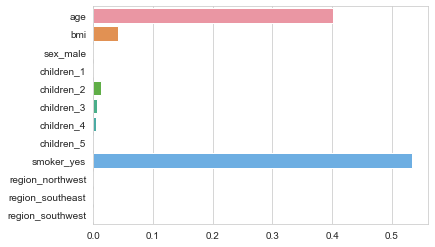

In [52]:
sns.barplot(y = X_train.columns, x = final_dt.feature_importances_)

#### As we saw in the EDA 'Smoker' feature plays very important role in deciding Insurance Price, and Age , BMI also play significant role in deciding the Insurance Price.

In [58]:
# We saw MSE as measure but that is not easily understood by everyone. So we'll use MAPE(Mean/Median Absolute Percentage error)
TestDataResult = pd.concat([X_test,y_test],axis = 1)
TestDataResult['y_pred'] = y_pred

TestDataResult['APE'] = (abs(TestDataResult.y_pred - TestDataResult.log_charges)/TestDataResult.log_charges)*100
print("Mean Absoulute Percentage Error is:", TestDataResult.APE.mean())
print("Median Absiulute Percentage Error is:", TestDataResult.APE.median())
print("Accuracy: ", np.round(100 - TestDataResult.APE.median(),2))


def AccuracyScore(pred,actual):
    ape = 100*(abs(pred - actual)/actual)
    return 100 - ape.mean()

#Defining custom scoring
from sklearn.metrics import make_scorer
custom_scoring = make_scorer(AccuracyScore, greater_is_better = True)

from sklearn.model_selection import cross_val_score
Accuracy = cross_val_score(model,X,y,cv=10,scoring = custom_scoring)
print("*"*100)
print("\tCross Fold Validation")
print("*"*100)
print("Accuracy for 10 folds: ",Accuracy)
print("Final average accuracy of the model:", np.round(Accuracy.mean(),2))


Mean Absoulute Percentage Error is: 2.5792661671590813
Median Absiulute Percentage Error is: 1.3875037661753018
Accuracy:  98.61
****************************************************************************************************
	Cross Fold Validation
****************************************************************************************************
Accuracy for 10 folds:  [97.6904034  97.68348323 97.09038731 96.79439071 97.44982627 97.96209724
 97.58324592 96.99081216 97.3554689  97.43609829]
Final average accuracy of the model: 97.4


#### Do Decision Tree performs better without OHE features ? 

In [62]:
DataWithoutOHE.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### Note: Though Decision Tree handles both Categorical and Continuous variables, scikit wants the values to be represted in Numerical form. So some transformation is required in order to apply DecisionTree. 

One way to handle this is to apply,
- sex -> ismale (0/1)
- smoker -> (0/1)
- region -> frequency based encoding

In [63]:
DataWithoutOHE.sex = DataWithoutOHE.sex.replace({'male':1, 'female':0})

DataWithoutOHE.smoker = DataWithoutOHE.smoker.replace({'yes':1, 'no':0})

region_dict = DataWithoutOHE.region.value_counts().to_dict()
DataWithoutOHE.region = DataWithoutOHE.region.map(region_dict)


In [64]:
DataWithoutOHE.charges = np.log(DataWithoutOHE.charges)

In [65]:
DataWithoutOHE.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,325,9.734176
1,18,1,33.770,1,0,364,7.453302
2,28,1,33.000,3,0,364,8.400538
3,33,1,22.705,0,0,325,9.998092
4,32,1,28.880,0,0,325,8.260197


In [71]:
X_dt = DataWithoutOHE.drop(columns='charges')
y_dt = DataWithoutOHE.charges
XTrain_dt,XTest_dt,ytrain_dt,ytest_dt = train_test_split(X_dt,y_dt,test_size = 0.3,random_state=0)

In [72]:
for d in range(2,12):
    RegMod = DecisionTreeRegressor(max_depth=d, criterion='mse')
    model_dt = RegMod.fit(XTrain_dt,ytrain_dt)
    pred = model_dt.predict(XTest_dt)
    error = mean_squared_error(ytest_dt,pred)
    print("With depth = {} accuracy = {}".format(d,1-error))
    

With depth = 2 accuracy = 0.7550316696632345
With depth = 3 accuracy = 0.8186137586862093
With depth = 4 accuracy = 0.8502219460762284
With depth = 5 accuracy = 0.8511773880765751
With depth = 6 accuracy = 0.8093133201648836
With depth = 7 accuracy = 0.7874770680959577
With depth = 8 accuracy = 0.7655730889779592
With depth = 9 accuracy = 0.7431873730262681
With depth = 10 accuracy = 0.7378172227397686
With depth = 11 accuracy = 0.7218556218787355


#### We see again that the accuracy is high when depth = 5. We'll again use the depth as 5 in our final model and apply cross_validation to check the final accuracy.

In [73]:
dt = DecisionTreeRegressor(criterion='mse', max_depth=5)

from sklearn.model_selection import cross_val_score
Accuracy = cross_val_score(dt,X_dt,y_dt,cv=10,scoring = custom_scoring)
print("*"*100)
print("\tCross Fold Validation")
print("*"*100)
print("Accuracy for 10 folds: ",Accuracy)
print("Final average accuracy of the model:", np.round(Accuracy.mean(),2))

****************************************************************************************************
	Cross Fold Validation
****************************************************************************************************
Accuracy for 10 folds:  [97.82217264 97.6434784  97.15429578 97.10642095 97.59929028 98.2238538
 97.71854099 97.29304937 97.51051002 97.44488923]
Final average accuracy of the model: 97.55
